In [ ]:
!apt-get install libgeos-3.5.0
!apt-get install libgeos-dev
!pip install https://github.com/matplotlib/basemap/archive/master.zip

Reading package lists... Done
Building dependency tree       
Reading state information... Done
E: Unable to locate package libgeos-3.5.0
E: Couldn't find any package by glob 'libgeos-3.5.0'
E: Couldn't find any package by regex 'libgeos-3.5.0'
Reading package lists... Done
Building dependency tree       
Reading state information... Done
libgeos-dev is already the newest version (3.6.2-1build2).
libgeos-dev set to manually installed.
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.
     | 149.0MB 1.6MB/s
     |████████████████████████████████| 6.5MB 4.5MB/s 
     |████████████████████████████████| 225kB 37.7MB/s 
  Created wheel for basemap: filename=basemap-1.2.2+dev-cp37-cp37m-linux_x86_64.whl size=121759566 sha256=dd0512e3ae2003fb691afb9dc1c6000921724a0b98ba20f6e443ae3efa087bc2
  Stored in directory: /tmp/pip-ephem-wheel-cache-jzwhkvo

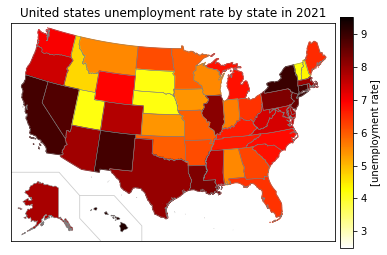

In [ ]:
from __future__ import (absolute_import, division, print_function)

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap as Basemap
from matplotlib.colors import rgb2hex, Normalize
from matplotlib.patches import Polygon
from matplotlib.colorbar import ColorbarBase

fig, ax = plt.subplots()

# Lambert Conformal map of lower 48 states.
m = Basemap(llcrnrlon=-119,llcrnrlat=20,urcrnrlon=-64,urcrnrlat=49,
            projection='lcc',lat_1=33,lat_2=45,lon_0=-95)

# Mercator projection, for Alaska and Hawaii
m_ = Basemap(llcrnrlon=-190,llcrnrlat=20,urcrnrlon=-143,urcrnrlat=46,
            projection='merc',lat_ts=20)  # do not change these numbers

#%% ---------   draw state boundaries  ----------------------------------------
## data from U.S Census Bureau
## http://www.census.gov/geo/www/cob/st2000.html
shp_info = m.readshapefile('st99_d00','states',drawbounds=True,
                           linewidth=0.45,color='gray')
shp_info_ = m_.readshapefile('st99_d00','states',drawbounds=False)

# population density by state from
# http://en.wikipedia.org/wiki/List_of_U.S._states_by_population_density
popdensity = {
'New Jersey':  7.7,
'Rhode Island':   7.1,
'Massachusetts':   6.8,
'Connecticut':	  8.3,
'Maryland':   6.2,
'New York':    8.5,
'Delaware':    6.5,
'Florida':     4.7,
'Ohio':	 4.7,
'Pennsylvania':	 7.3,
'Illinois':    7.1,
'California':  8.3,
'Hawaii':  9.0,
'Virginia':    5.9,
'Michigan':    5.1,
'Indiana':    3.9,
'North Carolina':  5.2,
'Georgia':     4.5,
'Tennessee':   5.0,
'New Hampshire':   3.0,
'South Carolina':  5.1,
'Louisiana':   7.3,
'Kentucky':   5.0,
'Wisconsin':  3.8,
'Washington':  5.4,
'Alabama':     3.8,
'Missouri':    4.2,
'Texas':   6.9,
'West Virginia':   5.9,
'Vermont':     2.9,
'Minnesota':  4.2,
'Mississippi':	 6.3,
'Iowa':	 3.7,
'Arkansas':    4.4,
'Oklahoma':    4.2,
'Arizona':     6.7,
'Colorado':    6.4,
'Maine':  4.8,
'Oregon':  6.0,
'Kansas':  3.7,
'Utah':	 2.9,
'Nebraska':    2.9,
'Nevada':  8.1,
'Idaho':   3.2,
'New Mexico':  8.3,
'South Dakota':	 2.9,
'North Dakota':	 4.4,
'Montana':     3.8,
'Wyoming':      5.3,
'Alaska':     6.6}

#%% -------- choose a color for each state based on population density. -------
colors={}
statenames=[]
cmap = plt.cm.hot_r # use 'reversed hot' colormap
vmin = 2.5; vmax = 9.5 # set range.
norm = Normalize(vmin=vmin, vmax=vmax)
for shapedict in m.states_info:
    statename = shapedict['NAME']
    # skip DC and Puerto Rico.
    if statename not in ['District of Columbia','Puerto Rico']:
        pop = popdensity[statename]
        # calling colormap with value between 0 and 1 returns
        # rgba value.  Invert color range (hot colors are high
        # population), take sqrt root to spread out colors more.
        colors[statename] = cmap(np.sqrt((pop-vmin)/(vmax-vmin)))[:3]
    statenames.append(statename)

#%% ---------  cycle through state names, color each one.  --------------------
for nshape,seg in enumerate(m.states):
    # skip DC and Puerto Rico.
    if statenames[nshape] not in ['Puerto Rico', 'District of Columbia']:
        color = rgb2hex(colors[statenames[nshape]])
        poly = Polygon(seg,facecolor=color,edgecolor=color)
        ax.add_patch(poly)

AREA_1 = 0.005  # exclude small Hawaiian islands that are smaller than AREA_1
AREA_2 = AREA_1 * 30.0  # exclude Alaskan islands that are smaller than AREA_2
AK_SCALE = 0.19  # scale down Alaska to show as a map inset
HI_OFFSET_X = -1900000  # X coordinate offset amount to move Hawaii "beneath" Texas
HI_OFFSET_Y = 250000    # similar to above: Y offset for Hawaii
AK_OFFSET_X = -250000   # X offset for Alaska (These four values are obtained
AK_OFFSET_Y = -750000   # via manual trial and error, thus changing them is not recommended.)

for nshape, shapedict in enumerate(m_.states_info):  # plot Alaska and Hawaii as map insets
    if shapedict['NAME'] in ['Alaska', 'Hawaii']:
        seg = m_.states[int(shapedict['SHAPENUM'] - 1)]
        if shapedict['NAME'] == 'Hawaii' and float(shapedict['AREA']) > AREA_1:
            seg = [(x + HI_OFFSET_X, y + HI_OFFSET_Y) for x, y in seg]
            color = rgb2hex(colors[statenames[nshape]])
        elif shapedict['NAME'] == 'Alaska' and float(shapedict['AREA']) > AREA_2:
            seg = [(x*AK_SCALE + AK_OFFSET_X, y*AK_SCALE + AK_OFFSET_Y)\
                   for x, y in seg]
            color = rgb2hex(colors[statenames[nshape]])
        poly = Polygon(seg, facecolor=color, edgecolor='gray', linewidth=.45)
        ax.add_patch(poly)

ax.set_title('United states unemployment rate by state in 2021')

#%% ---------  Plot bounding boxes for Alaska and Hawaii insets  --------------
light_gray = [0.8]*3  # define light gray color RGB
x1,y1 = m_([-190,-183,-180,-180,-175,-171,-171],[29,29,26,26,26,22,20])
x2,y2 = m_([-180,-180,-177],[26,23,20])  # these numbers are fine-tuned manually
m_.plot(x1,y1,color=light_gray,linewidth=0.8)  # do not change them drastically
m_.plot(x2,y2,color=light_gray,linewidth=0.8)

#%% ---------   Show color bar  ---------------------------------------
ax_c = fig.add_axes([0.9, 0.1, 0.03, 0.8])
cb = ColorbarBase(ax_c,cmap=cmap,norm=norm,orientation='vertical',
                  label=r'[unemployment rate]')

plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:95: RuntimeWarning: invalid value encountered in sqrt


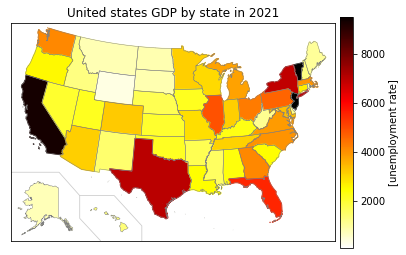

In [ ]:
from __future__ import (absolute_import, division, print_function)

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap as Basemap
from matplotlib.colors import rgb2hex, Normalize
from matplotlib.patches import Polygon
from matplotlib.colorbar import ColorbarBase

fig, ax = plt.subplots()

# Lambert Conformal map of lower 48 states.
m = Basemap(llcrnrlon=-119,llcrnrlat=20,urcrnrlon=-64,urcrnrlat=49,
            projection='lcc',lat_1=33,lat_2=45,lon_0=-95)

# Mercator projection, for Alaska and Hawaii
m_ = Basemap(llcrnrlon=-190,llcrnrlat=20,urcrnrlon=-143,urcrnrlat=46,
            projection='merc',lat_ts=20)  # do not change these numbers

#%% ---------   draw state boundaries  ----------------------------------------
## data from U.S Census Bureau
## http://www.census.gov/geo/www/cob/st2000.html
shp_info = m.readshapefile('st99_d00','states',drawbounds=True,
                           linewidth=0.45,color='gray')
shp_info_ = m_.readshapefile('st99_d00','states',drawbounds=False)

# population density by state from
# http://en.wikipedia.org/wiki/List_of_U.S._states_by_population_density
popdensity = {
'New Jersey':  18.41,
'Rhode Island':   179,
'Massachusetts':   1738,
'Connecticut':	  835,
'Maryland':   1258,
'New York':    5071,
'Delaware':    224,
'Florida':     3260,
'Ohio':	 2006,
'Pennsylvania':	 2321,
'Illinois':    2568,
'California':  9203,
'Hawaii':  269,
'Virginia':    1641,
'Michigan':    1535,
'Indiana':    1105,
'North Carolina':  1742,
'Georgia':     1840,
'Tennessee':   1082,
'New Hampshire':   253,
'South Carolina':  718,
'Louisiana':   720,
'Kentucky':   624,
'Wisconsin':  1007,
'Washington':  1837,
'Alabama':     668,
'Missouri':    955,
'Texas':   5219,
'West Virginia':   219,
'Vermont':     97,
'Minnesota':  1112,
'Mississippi':	 339,
'Iowa':	 571,
'Arkansas':    383,
'Oklahoma':    556,
'Arizona':     1106,
'Colorado':    1159,
'Maine':  197,
'Oregon':  745,
'Kansas':  515,
'Utah':	 577,
'Nebraska':    382,
'Nevada':  512,
'Idaho':   249,
'New Mexico':  299,
'South Dakota':	 162,
'North Dakota':	 160,
'Montana':     153,
'Wyoming':      108,
'Alaska':     149}

#%% -------- choose a color for each state based on population density. -------
colors={}
statenames=[]
cmap = plt.cm.hot_r # use 'reversed hot' colormap
vmin = 100; vmax = 9500 # set range.
norm = Normalize(vmin=vmin, vmax=vmax)
for shapedict in m.states_info:
    statename = shapedict['NAME']
    # skip DC and Puerto Rico.
    if statename not in ['District of Columbia','Puerto Rico']:
        pop = popdensity[statename]
        # calling colormap with value between 0 and 1 returns
        # rgba value.  Invert color range (hot colors are high
        # population), take sqrt root to spread out colors more.
        colors[statename] = cmap(np.sqrt((pop-vmin)/(vmax-vmin)))[:3]
    statenames.append(statename)

#%% ---------  cycle through state names, color each one.  --------------------
for nshape,seg in enumerate(m.states):
    # skip DC and Puerto Rico.
    if statenames[nshape] not in ['Puerto Rico', 'District of Columbia']:
        color = rgb2hex(colors[statenames[nshape]])
        poly = Polygon(seg,facecolor=color,edgecolor=color)
        ax.add_patch(poly)

AREA_1 = 0.005  # exclude small Hawaiian islands that are smaller than AREA_1
AREA_2 = AREA_1 * 30.0  # exclude Alaskan islands that are smaller than AREA_2
AK_SCALE = 0.19  # scale down Alaska to show as a map inset
HI_OFFSET_X = -1900000  # X coordinate offset amount to move Hawaii "beneath" Texas
HI_OFFSET_Y = 250000    # similar to above: Y offset for Hawaii
AK_OFFSET_X = -250000   # X offset for Alaska (These four values are obtained
AK_OFFSET_Y = -750000   # via manual trial and error, thus changing them is not recommended.)

for nshape, shapedict in enumerate(m_.states_info):  # plot Alaska and Hawaii as map insets
    if shapedict['NAME'] in ['Alaska', 'Hawaii']:
        seg = m_.states[int(shapedict['SHAPENUM'] - 1)]
        if shapedict['NAME'] == 'Hawaii' and float(shapedict['AREA']) > AREA_1:
            seg = [(x + HI_OFFSET_X, y + HI_OFFSET_Y) for x, y in seg]
            color = rgb2hex(colors[statenames[nshape]])
        elif shapedict['NAME'] == 'Alaska' and float(shapedict['AREA']) > AREA_2:
            seg = [(x*AK_SCALE + AK_OFFSET_X, y*AK_SCALE + AK_OFFSET_Y)\
                   for x, y in seg]
            color = rgb2hex(colors[statenames[nshape]])
        poly = Polygon(seg, facecolor=color, edgecolor='gray', linewidth=.45)
        ax.add_patch(poly)

ax.set_title('United states GDP by state in 2021')

#%% ---------  Plot bounding boxes for Alaska and Hawaii insets  --------------
light_gray = [0.8]*3  # define light gray color RGB
x1,y1 = m_([-190,-183,-180,-180,-175,-171,-171],[29,29,26,26,26,22,20])
x2,y2 = m_([-180,-180,-177],[26,23,20])  # these numbers are fine-tuned manually
m_.plot(x1,y1,color=light_gray,linewidth=0.8)  # do not change them drastically
m_.plot(x2,y2,color=light_gray,linewidth=0.8)

#%% ---------   Show color bar  ---------------------------------------
ax_c = fig.add_axes([0.9, 0.1, 0.03, 0.8])
cb = ColorbarBase(ax_c,cmap=cmap,norm=norm,orientation='vertical',
                  label=r'[unemployment rate]')

plt.show()